In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
to_df = lambda arr: pd.DataFrame(arr)

# The dataframes

In [3]:
acc = pd.read_csv('accounts.csv')
sp = pd.read_csv('sales_pipeline.csv')
pr = pd.read_csv('products.csv')
st = pd.read_csv('sales_teams.csv')

In [4]:
print("Account sample")
print(acc.info())
print(acc.head())
print("--------------------")
print("Sales pipeline sample")
print(sp.info())
print(sp.head())
print("--------------------")
print("Products sample")
print(pr.info())
print(pr.head())
print("--------------------")
print("Sales team sample")
print(st.info())
print(st.head())


Account sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB
None
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical   

## Checking Nulls

In [5]:
acc_null_sum = acc.isnull().sum()
pr_null_sum = pr.isnull().sum()
sp_null_sum = sp.isnull().sum()
st_null_sum = st.isnull().sum()

print("Null Sums for Accounts Dataset:")
print(acc_null_sum)

print("\nNull Sums for Products Dataset:")
print(pr_null_sum)

print("\nNull Sums for Sales Pipeline Dataset:")
print(sp_null_sum)

print("\nNull Sums for Sales Teams Dataset:")
print(st_null_sum)

Null Sums for Accounts Dataset:
account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

Null Sums for Products Dataset:
product        0
series         0
sales_price    0
dtype: int64

Null Sums for Sales Pipeline Dataset:
opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

Null Sums for Sales Teams Dataset:
sales_agent        0
manager            0
regional_office    0
dtype: int64


In [6]:
acc['subsidiary_of'] = acc['subsidiary_of'].fillna('Unknown')

In [7]:
acc_dup_sum = acc.duplicated().sum()
pr_dup_sum = pr.duplicated().sum()
sp_dup_sum = sp.duplicated().sum()
st_dup_sum = st.duplicated().sum()

print(acc_dup_sum)
print(pr_dup_sum)
print(sp_dup_sum)
print(st_dup_sum)

0
0
0
0


# Further data exploration

In [8]:
to_df(acc['subsidiary_of'].unique())

,0
0,Unknown
1,Acme Corporation
2,Massive Dynamic
3,Bubba Gump
4,Inity
5,Sonron
6,Golddex
7,Warephase


In [9]:
to_df(sp['deal_stage'].unique())

,0
0,Won
1,Engaging
2,Lost
3,Prospecting


In [10]:
to_df(acc['office_location'].unique())

,0
0,United States
1,Kenya
2,Philipines
3,Japan
4,Italy
5,Norway
6,Korea
7,Jordan
8,Brazil
9,Germany


# Pivot tables

### Revenue per office_location

In [11]:
Revenue_per_office_location_pivot = acc.pivot_table(index="office_location", values="revenue", aggfunc="sum")
Revenue_per_office_location_pivot

,revenue
office_location,
Belgium,1376.80
Brazil,405.59
China,40.79
Germany,1012.72
Italy,894.33
Japan,5158.71
Jordan,3027.46
Kenya,647.18
Korea,8170.38


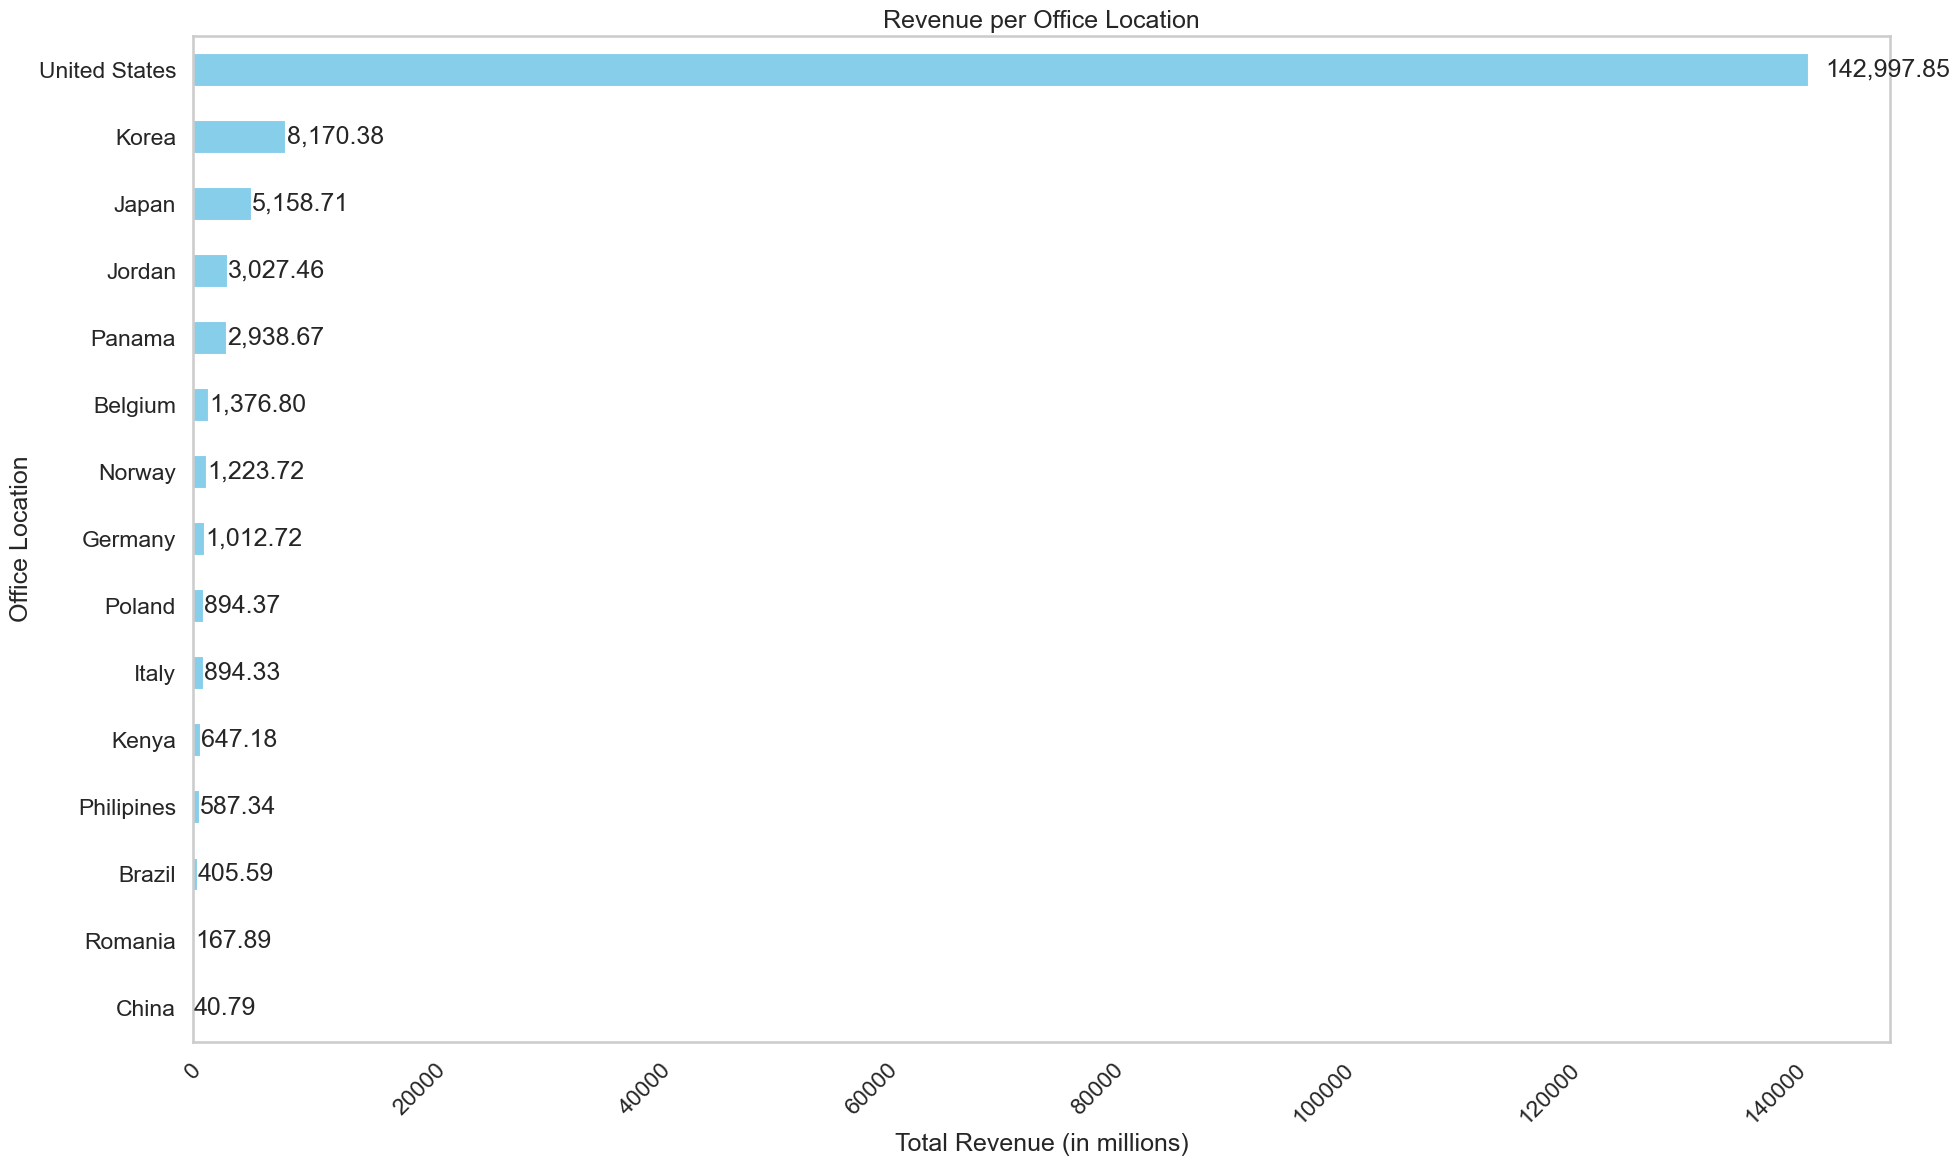

In [34]:
fig, ax = plt.subplots(figsize=(20, 12))

Revenue_per_office_location_pivot.sort_values("revenue", inplace=True)

Revenue_per_office_location_pivot.plot(
    kind='barh',
    legend=False,
    color='skyblue',
    ax=ax
)

ax.set_title("Revenue per Office Location")
ax.set_xlabel("Total Revenue (in millions)")
ax.set_ylabel("Office Location")
ax.tick_params(axis='x', labelrotation=45)
ax.grid(False)

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + width * 0.01, y, f'{width:,.2f}', va='center')

plt.tight_layout()
plt.show()


In [13]:
won_deals = sp[sp["deal_stage"] == "Won"]

agent_revenue = won_deals.groupby("sales_agent")["close_value"].sum().reset_index()

agent_revenue.columns = ["sales_agent", "total_close_value"]

agent_revenue


,sales_agent,total_close_value
0,Anna Snelling,275056.0
1,Boris Faz,261631.0
2,Cassey Cress,450489.0
3,Cecily Lampkin,229800.0
4,Corliss Cosme,421036.0
5,Daniell Hammack,364229.0
6,Darcel Schlecht,1153214.0
7,Donn Cantrell,445860.0
8,Elease Gluck,289195.0
9,Garret Kinder,197773.0


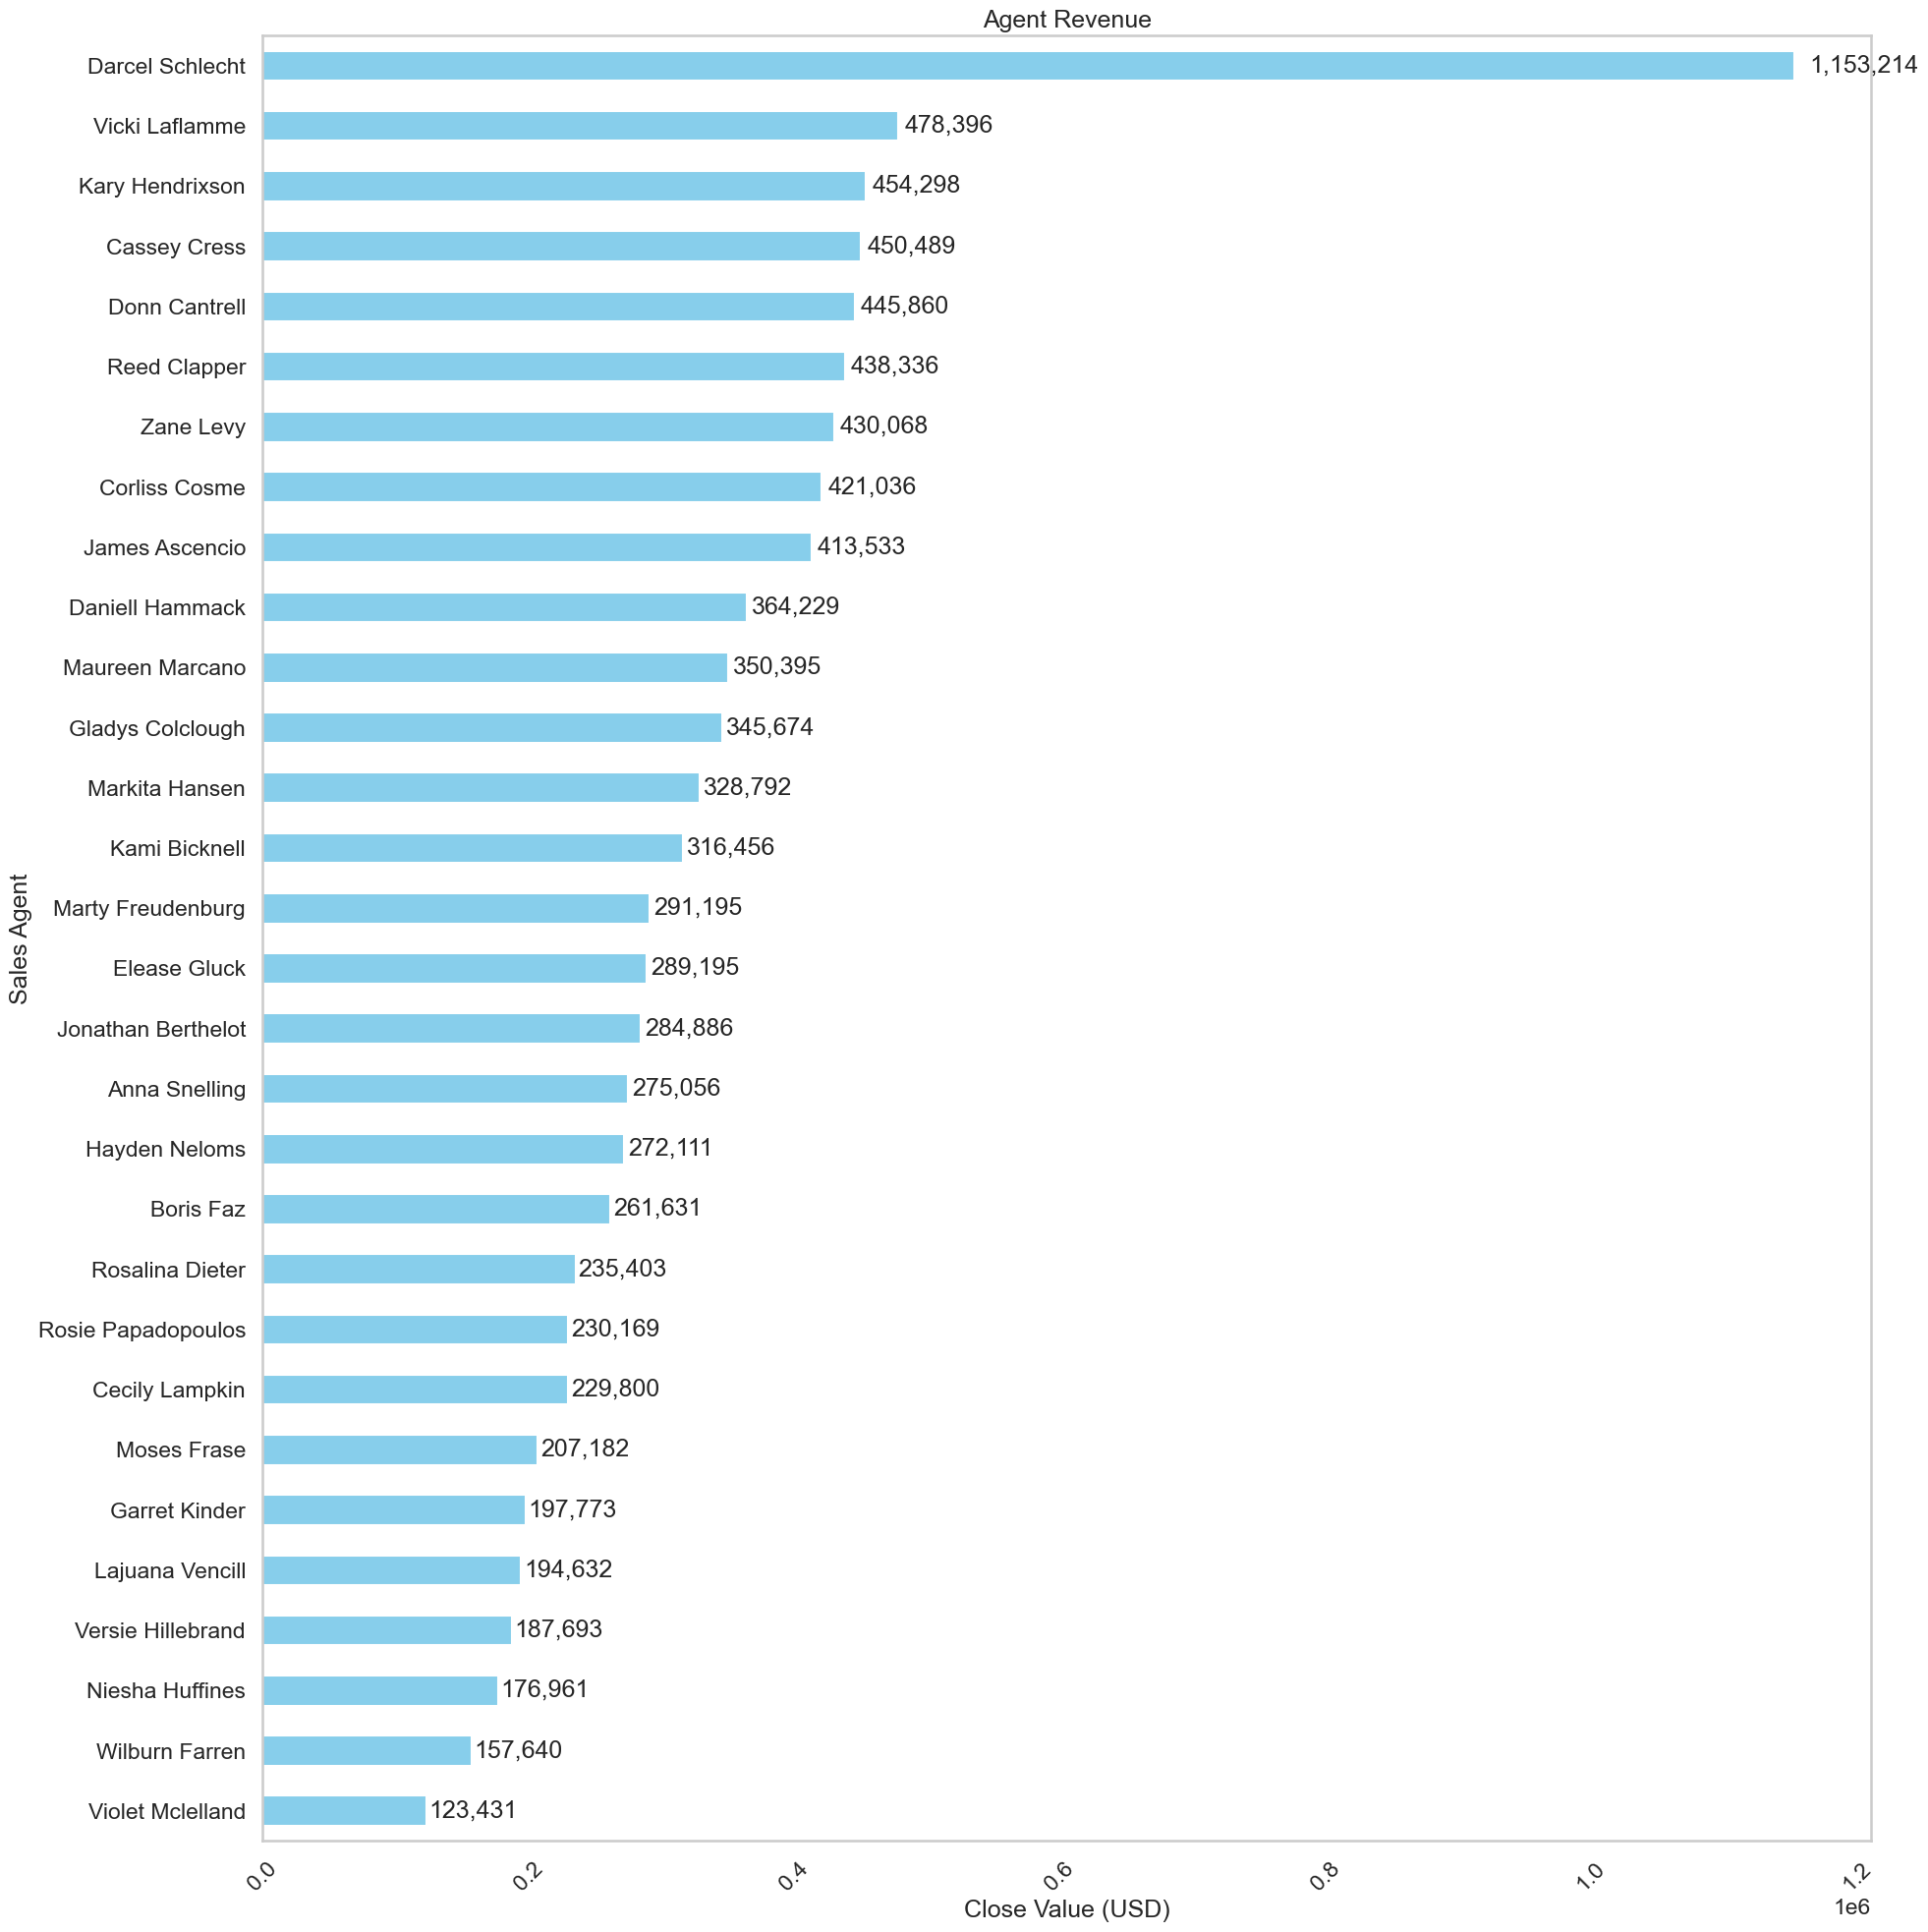

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))

agent_revenue.sort_values("total_close_value", ascending=True).plot(
    x="sales_agent",
    y="total_close_value",
    kind="barh",
    legend=False,
    color='skyblue',
    ax=ax
)

ax.set_title("Agent Revenue")
ax.set_xlabel("Close Value (USD)")
ax.set_ylabel("Sales Agent")
ax.tick_params(axis='x', labelrotation=45)
ax.grid(False)

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + width * 0.01, y, f'{width:,.0f}', va='center')

plt.tight_layout()
plt.show()


In [16]:
merged_df = won_deals.merge(pr, on='product', how='inner')

product_revenue = merged_df.groupby('product')['close_value'].sum().reset_index()

product_revenue.columns = ['product', 'total_close_value']

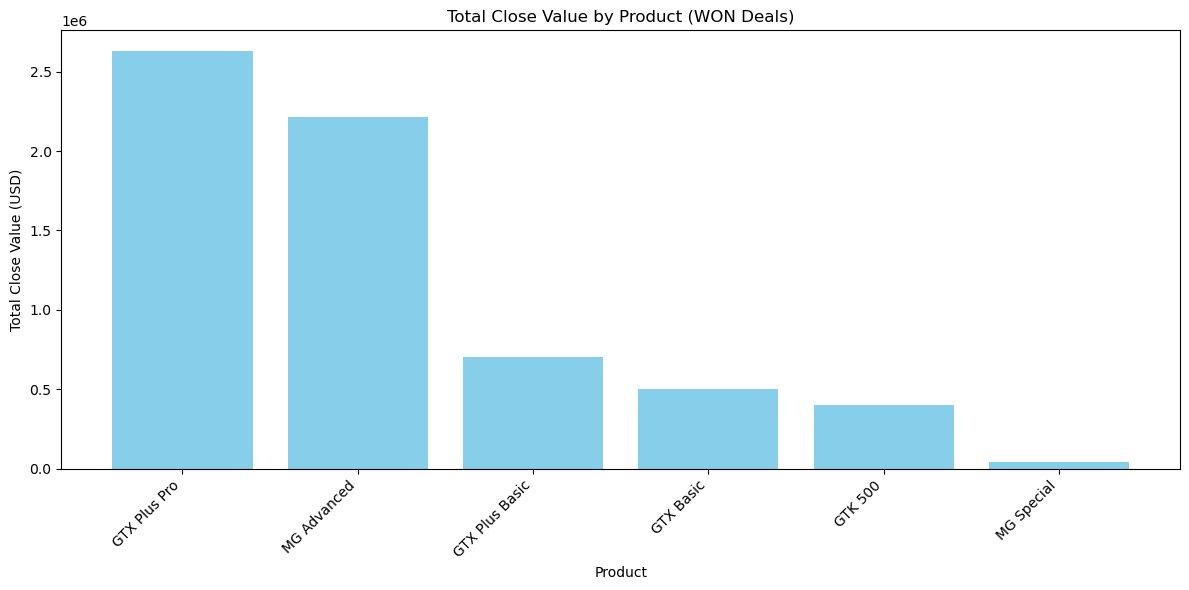

In [17]:
product_revenue_sorted = product_revenue.sort_values('total_close_value', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(product_revenue_sorted['product'], product_revenue_sorted['total_close_value'], color='skyblue')

plt.title('Total Close Value by Product (WON Deals)')
plt.xlabel('Product')
plt.ylabel('Total Close Value (USD)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

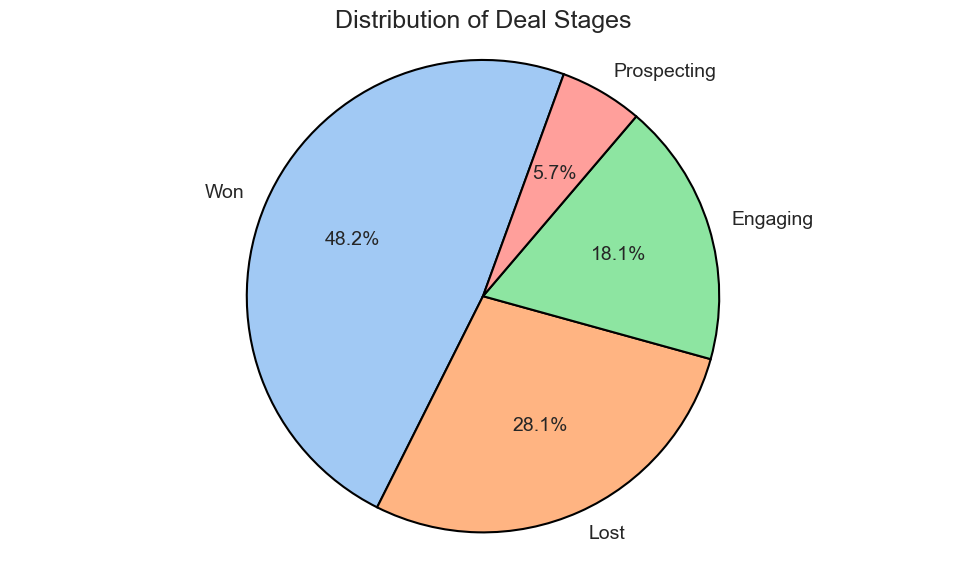

In [25]:
sns.set_style("whitegrid")
sns.set_context("talk") 

pie_colors = sns.color_palette("pastel")[0:sp['deal_stage'].nunique()]

plt.figure(figsize=(10, 6))
sp['deal_stage'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=pie_colors,
    startangle=70,
    wedgeprops={'edgecolor': 'k'},
    textprops={'fontsize': 14}
)
plt.title('Distribution of Deal Stages', fontsize=18)
plt.ylabel('') 
plt.axis('equal') 
plt.tight_layout()
plt.show()



In [27]:
sector_merge = acc.merge(sp, on='account')

sector_counts = sector_merge.groupby('sector')['sales_agent'].count().reset_index()

sector_counts.columns = ['sector', 'sales_agent_count']

sector_counts

,sector,sales_agent_count
0,employment,311
1,entertainment,451
2,finance,678
3,marketing,674
4,medical,1051
5,retail,1397
6,services,390
7,software,757
8,technolgy,1165
9,telecommunications,501


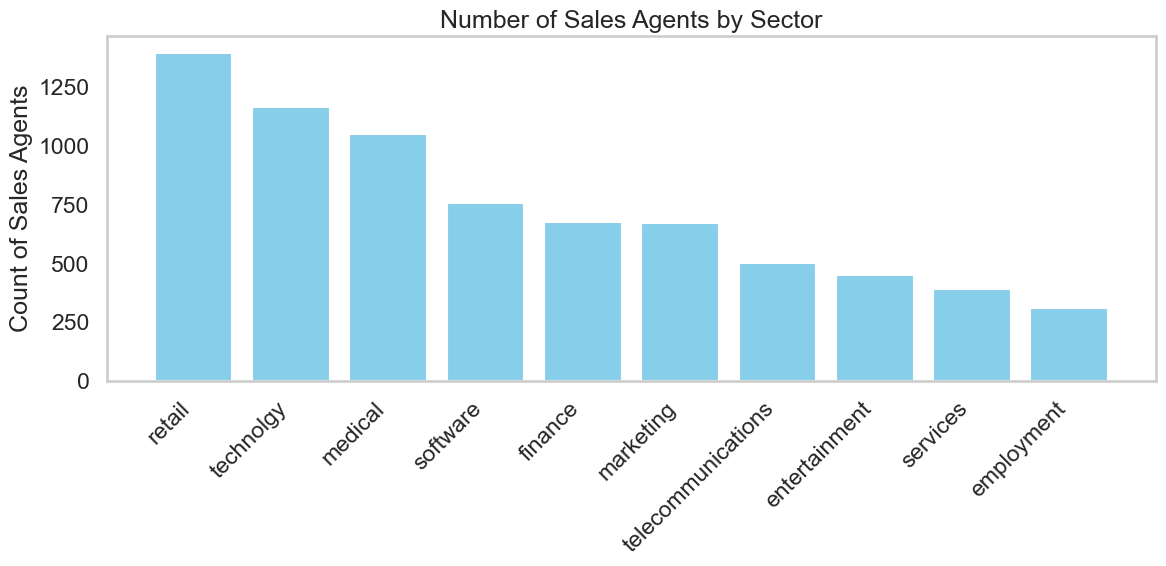

In [39]:
sector_counts_sorted = sector_counts.sort_values('sales_agent_count', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(sector_counts_sorted['sector'], sector_counts_sorted['sales_agent_count'], color='skyblue')

plt.title('Number of Sales Agents by Sector')
plt.ylabel('Count of Sales Agents')
plt.xticks(rotation=45, ha='right')
plt.grid(False)  

plt.tight_layout()
plt.show()
